# La Regresión logística Simple

En la unidad No. 1 nos hemos concentrado en una variable dependiente en la que su naturaleza es numérica.
Pero qué pasa cuando tenemos una variable dependiente categórica, particularmente una con dos niveles?

Este tipo de preguntas y o problemas forman parte de los problemas de clasificación, en donde tenemos un conjunto de datos que consta de variables de entrada "X" y una variable de salida categórica "Y". 

A diferencia de la regresión lineal, en este modelo encontraremos la mejor función logística para describir la relación entre variable dependiente y dependiente.

Me pueden dar ejemplos de variables categóricas con dos niveles?

Perfecto, ahora que comprendemos bien la naturaleza de nuestra variable dependiente podemos continuar con el modelo descrito por la relación logística, en la que podremos predecir la probabilidad de que un nuevo caso pertenezca a la clase Y = 1. En otras palabras, el modelo de regresión logística predice P(Y=1) en función de "X". 



    

### ¿Porqué existe un modelo diferente para este tipo de modelo?

Pues básicamente porque la regresión lineal no da una buena línea de ajuste para los problemas que tienen solo dos niveles en la variable dependiente, y consecuentemente da menos precisión durante la predicción porque no cubre los conjuntos de datos, ya que es de naturaleza lineal.

Es así que para lograr un mejor ajuste de los datos categóricos, se requiere una curva que sólo es posible con la regresión logística, ya que utiliza una función sigmoidea para hacer predicciones.

## La función logística

La función logística también conocida como Sigmoida generalmente se denota por σ(x) o sig(x) y esta dada por:


$$σ(x) = \frac{1}{1+e^{-x}}$$



Esta es la función matemática que tiene la 'curva en forma de S', y su valor siempre se encuentra entre 0 y 1, por lo que se la implementa para resolver problemas categóricos que tienen dos valores posibles.

Adicionalmente, establece un valor para punto de corte, que en su mayoría se establece en 0,5, por lo que si se supera el resultado previsto de la curva logística, p > 0.5, la nueva observación se clasificará como y = 1, de lo contrario se clasificará como y = 0.

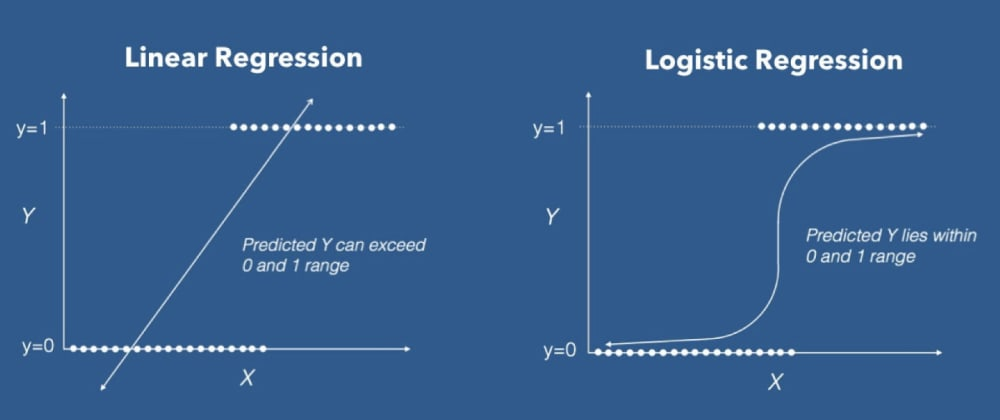

_Fuente: Medium: A Comparison between Linear and Logistic Regression_

Tras cámaras, lo que sucede es que la Regresión logística funciona como la lineal, en el sentido que transforma los resultados obtenidos por esta aplicando la función sigmoidea para acotar los valores entre 0 y 1 y así garantizar que las probabilidades estén siempre entre 0 y 1.

Así, cuando "X" alcanza valores muy altos y positivos, el valor de $e^{-x}$ es aproximadamente 0. Si reemplazamos esto en la fórmula precedente veremos entonces que, el valor de la función sigmoide es 1. Por el contrario, cuando "X" alcanza valores muy altos pero negativos, el valor de $e^{-x}$ tiende a infinito por lo que el valor de la función sigmoide será de 0.

### Conceptos previos: Odds y logaritmo de los odds

En estadística, los odds son la relación entre la probabilidad de que algo suceda y la probabilidad de que no suceda, por lo que la fórmula se la describe como:

$$odds = \frac{(P) de. que. algo. suceda}{(P) de. que. algo. no. suceda}$$


 $$ odds=\frac{p}{1-p} $$

Por ejemplo, la probabilidad de que una observación pertenezca a la clase y = 1 es $\frac{p}{1-p}$, por lo que cuando las probabilidades están entre 0 y 1, los odds están en contra de que la observación pertenezca a y = 1. En cambio, cuando las probabilidades son mayores que 1, las odds están a favor de la observación pertenezca a y = 1.

_Nota No. 1: Los odds son un símil a ratios de probabilidad y no están acotados entre 0 y 1._

Este concepto es un poco más fácil de comprender si lo pensamos bajo la óptica de apuestas. Por ejemplo: si estamos en un casino y queremos jugar a los dados, podríamos apostar a que saldría un número, en este caso escojamos el número 6.

La probabilidad de que ganemos es 1/6. Entonces, los odds a favor de que ganemos son (1/6) / (5/6) = 1/5 o 1:5, como esto equivale a 0.2, y no es mayor a 1,  las probabilidades están claramente en contra de que ganemos dado que las probabilidades de que perdamos son (5/6) / (1/6) = 5:1, lo que equivale a 5.

Realicemos un ejercicio donde creemos un dataFrame conteniendo algunos valores de probabilidad de 0 a 1, calculemos los odds o el ratio, y sobre este apliquemos logaritmos. 

In [82]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [83]:
df_probabilidades=pd.DataFrame({'p':np.arange(0.0, 1.1, 0.1)})

In [84]:
df_probabilidades['1-p']=1-df_probabilidades.p
df_probabilidades['odds']=df_probabilidades['p']/df_probabilidades['1-p']
df_probabilidades['log_odds']=np.log(df_probabilidades.odds)
df_probabilidades

,p,1-p,odds,log_odds
0,0.0,1.0,0.000000,-inf
1,0.1,0.9,0.111111,-2.197225
2,0.2,0.8,0.250000,-1.386294
3,0.3,0.7,0.428571,-0.847298
4,0.4,0.6,0.666667,-0.405465
5,0.5,0.5,1.000000,0.000000
6,0.6,0.4,1.500000,0.405465
7,0.7,0.3,2.333333,0.847298
8,0.8,0.2,4.000000,1.386294
9,0.9,0.1,9.000000,2.197225


El rango de valores que pueden tomar los Odds es de [0,∞]. 

Aplicando la transformación logit, podemos convertir el rango de probabilidades limitado a [0,1] a [−∞,+∞].

Por su parte el logaritmo de los odds, no es más que lo que su nombre sugiere: el logaritmo natural de la función previamente descrita. A este último se lo conoce también como la función logística y explicada a más detalle en la sección del modelo matemático. 

#### Bajo esta introducción qué problemas en la industria financiera se les ocurre interesantes para usar esta función?

## Definición matemática del modelo

Tomando en cuenta la función logit, podemos definir a la ecuación logística como:

$$logit(p) = log(odds)=logit(Y)=\ln (\frac{p}{1-p})=\hat \beta_0+\hat \beta_{1}X_1+.... \hat \beta_{n}X_n+\underbrace{\epsilon}_{error}$$


Ahora, si reemplazamos el valor de X con el de la función lineal obtenemos:

$$logit(Y)=\frac{1}{1+e^-{(\hat \beta_0+\hat \beta_{1}X_1)}}$$


Resolviendo para el denominador obtenemos la probabilidad de que la variable cualitativa "Y" tome el valor k (el nivel de referencia, codificado como 1), dado que el predictor "X" tiene el valor x.

$$logit(Y)=\frac{e^{(\hat \beta_0+\hat \beta_{1}X_1)}}{1+e^{(\hat \beta_0+\hat \beta_{1}X_1)}}$$

Donde β0  es la probabilidad esperada de pertenecer a la clase 1 cuando todos los predictores son cero. Por su parte, el resto de betas indican el cambio promedio del logaritmo de odds al incrementar en una unidad la variable predictora "X", manteniendo constantes el resto de variables.

Existe una relación con esta función y el logaritmo de los Odds, que nos permite relacionar de mejor manera los estimadores:



$$ ln(\frac{{p(Y=k|X=x)}}{{(1-p(Y=k|X=x)}})=\hat \beta_0+\hat \beta_{1}X_1+.... +\underbrace{\epsilon}_{error}$$


Recordemos que en la regresión lineal simple, modelábamos el valor de la variable dependiente "Y" en función del valor del predictor "X". Sin embargo, en la Regresión Logística, se modela la _probabilidad_ de que nuestra variable de respuesta "Y" pertenezca al nivel de referencia 1 en función del valor de las variables explicativas, mediante el uso de Log of Odds expresado matemáticamente en la anterior función.

Al igual que en la regresión lineal, el modelo de regresión logística encuentra los mejores valores de los estimadores para ajustarse al conjunto de datos, la diferencia principal es que no lo hace por el método de MCO. Como el resultado 
de la ecuación lineal logística es log(p/(1-p)), no podemos calcular su valor por el método de regresión tradicional porque no conocemos el valor de p. El único resultado que conocemos es la clase de y = 0 o 1, por ello tenemos que emplear otro método de estimación: el Método de Máxima Verosimulitud-MLE


### El método de Máxima Versonilitud-MLE

En este método de estimación, se utiliza una función de probabilidad que mide qué tan bien se ajusta un conjunto de parámetros a una muestra de datos. Los valores de los parámetros que maximizan la función de verosimilitud son las estimaciones de máxima verosimilitud. En otras palabras, el objetivo es hacer inferencias sobre la población que es más probable que haya generado el conjunto de datos de entrenamiento.

En el caso de la regresión logística, queremos encontrar las estimaciones de los parámetros β0 y β1.

Otra forma para ajustar un modelo de Regresión Logística es empleando descenso de gradiente, que es materia de la siguiente semana donde obtendremos resultados de estos modelos en el ámbito del machine learning.

### Ajuste del modelo

Al igual que en el modelo de regresión lineal, en el modelo de Regresión Logística analizaremos los p-values para evaluar si el modelo es mejor que un modelo sin predictores, solo con β0. Para ello nos basaremos en el likelihood ratio, que es el que Python utiliza por defecto.

El likelihood ratio usa la diferencia entre la probabilidad de obtener los valores observados con el modelo logístico y las probabilidades de hacerlo con un modelo sin relación entre las variables. Para ello, calcula la significancia de la diferencia de residuos entre el modelo con predictores y el modelo nulo. El estadístico tiene una distribución chi-cuadrado con grados de libertad equivalentes a la diferencia de grados de libertad de los dos modelos comparados. Si se compara respecto al modelo nulo, los grados de libertad equivalen al número de predictores del modelo generado. 

# Supuestos del modelo de Regresión Logística

Similar a la regresión lineal, la regresión logística tiene ciertos supuestos. Pero la mayoría de ellos también se pueden relajados con la transformación logarítmica de la mano izquierda.


### 1. Variable dependiente categórica binaria

Como se mencionó al principio, la regresión logística es para problemas de clasificación, por lo que necesitamos asegurarnos de que la variable objetivo sea binaria.

#### Formas de verificación

- La forma más sencilla de verificar el supuesto, es comprobando que en nuestra base de datos la variable "Y" sea categórica, o de tipo "object". 

#### Posibles soluciones

Para dar solución a este supuesto, lo mejor es recodificar nuestra variable dependiente a los valores de que algo suceda (1) y a los valores de que algo no suceda (0). En otras palabras, el factor de nivel 1 de la variable dependiente debería representar el resultado deseado.

### 2. Relación lineal entre el logaritmo natural de odds y la variable continua

El modelo logístico requiere que las variables independientes están linealmente relacionadas con las probabilidades logarítmicas, patrones en forma de U son una clara violación de esta condición.

Importante: La Regresión Logística no requiere que la variable independiente presente una distribución normal.

### 3. No colinealidad perfecta entre las covariables  

Aunque encontrar multicolinealidad perfecta es bastante extraño, lo que generalmente implica es que existe duplicidad de variables explicativas en el modelo. También puede ser el caso que existe una segunda variable derivada de la primera más una constante. 

El problema de la multicolinearidad perfecta es que implica estimadores indeterminados y una varianza infinita de los estimadores.

$$ var \hat{\beta} = inf $$

Lo cierto es que es más común en la práctica encontrarnos con situaciones donde exista multicolinearidad no perfecta que provoque errores elevados y de acuerdo con (Gujarati, 2007, p.329) estadísticos pequeños que llevan a no rechazar la hpótesis nula, lo que incrementaría la probabilidad de cometer errores de tipo II.


En sí el problema de violar este supuesto es que obtiene estimadores menos precisos y muy sensibles a cambios en los datos.

#### Formas de verificación

Existe una herramienta llamada Factor de inflación de la varianza-VIF la cual devuelve un valor conforme al nivel de asociación de las variables predictoras ( mide la correlación y la fuerza de la correlación ). Los rangos a tomar en cuenta del VIF son los siguientes:

$$ \textrm{VIF}_i = \frac{1}{1-R_i^2}$$

- Si el VIF es 1, no existe entre las variables analizadas

- Si el VIF es >1 y <5, la correlación es moderada entre entre las variables analizadas, pero no constituye a menudo una transgresión grave para requerir atención

- Si el VIF es >5, la correlación es potencialmente severa entre entre entre las variables analizadasuna por lo que las estimaciones de los coeficientes y los valores p en el resultado de la regresión probablemente no sean confiables

#### Posibles soluciones

- Verificar que no exista duplicidad entre variables

- Retirar uno de los pares de variables que presente el mayor VIF e ir trabajando uno a uno hasta que el VIF se estabilice

### 4. Grandes tamaños de muestra 

Se espera que el modelo de regresión logística sea construído con tamaños de muestra bastante grandes, aunque dependiendo de los resultados del modelo, este supuesto puede ser relajado.

_Nota No. 2: Primero, la regresión logística no requiere que los términos de error se distribuyan normalmente. Segundo, no requiere homocedasticidad, por lo que consume menos tiempo en la verificación de los supuestos._ 

_En términos generales lo que sí requiere es que haya independencia de los errores, linealidad para las variables continuas, y la ausencia de multicolinealidad conjuntamente de la ausencia de valores atípicos fuertemente influyentes._

## La Regresion Logística en Python por Statsmodel

Para correr un modelo de Regresión Logística en Python tenemos varias opciones. Las tres más comunes son mediante las librerías de:

    - statsmodels  (https://www.statsmodels.org/stable/user-guide.html)
    
    - scikit-learn (https://scikit-learn.org/stable/)
    
    - SciPy        (https://scipy.org/) 
    
A lo largo de este curso aplciaremos las dos primeras, y el día de hoy concretamente statsmodel, ya que ofrece una serie de funcionalidades que no se encuentran en modules como sklearn. Entre estas, la posibilidad de realizar las pruebas de los supuestos de la regresión.

Para importarla lo primero que debemos hacer si no la tenemos instalada, es abrir el Anaconda prompt y escribir pip install statsmodel

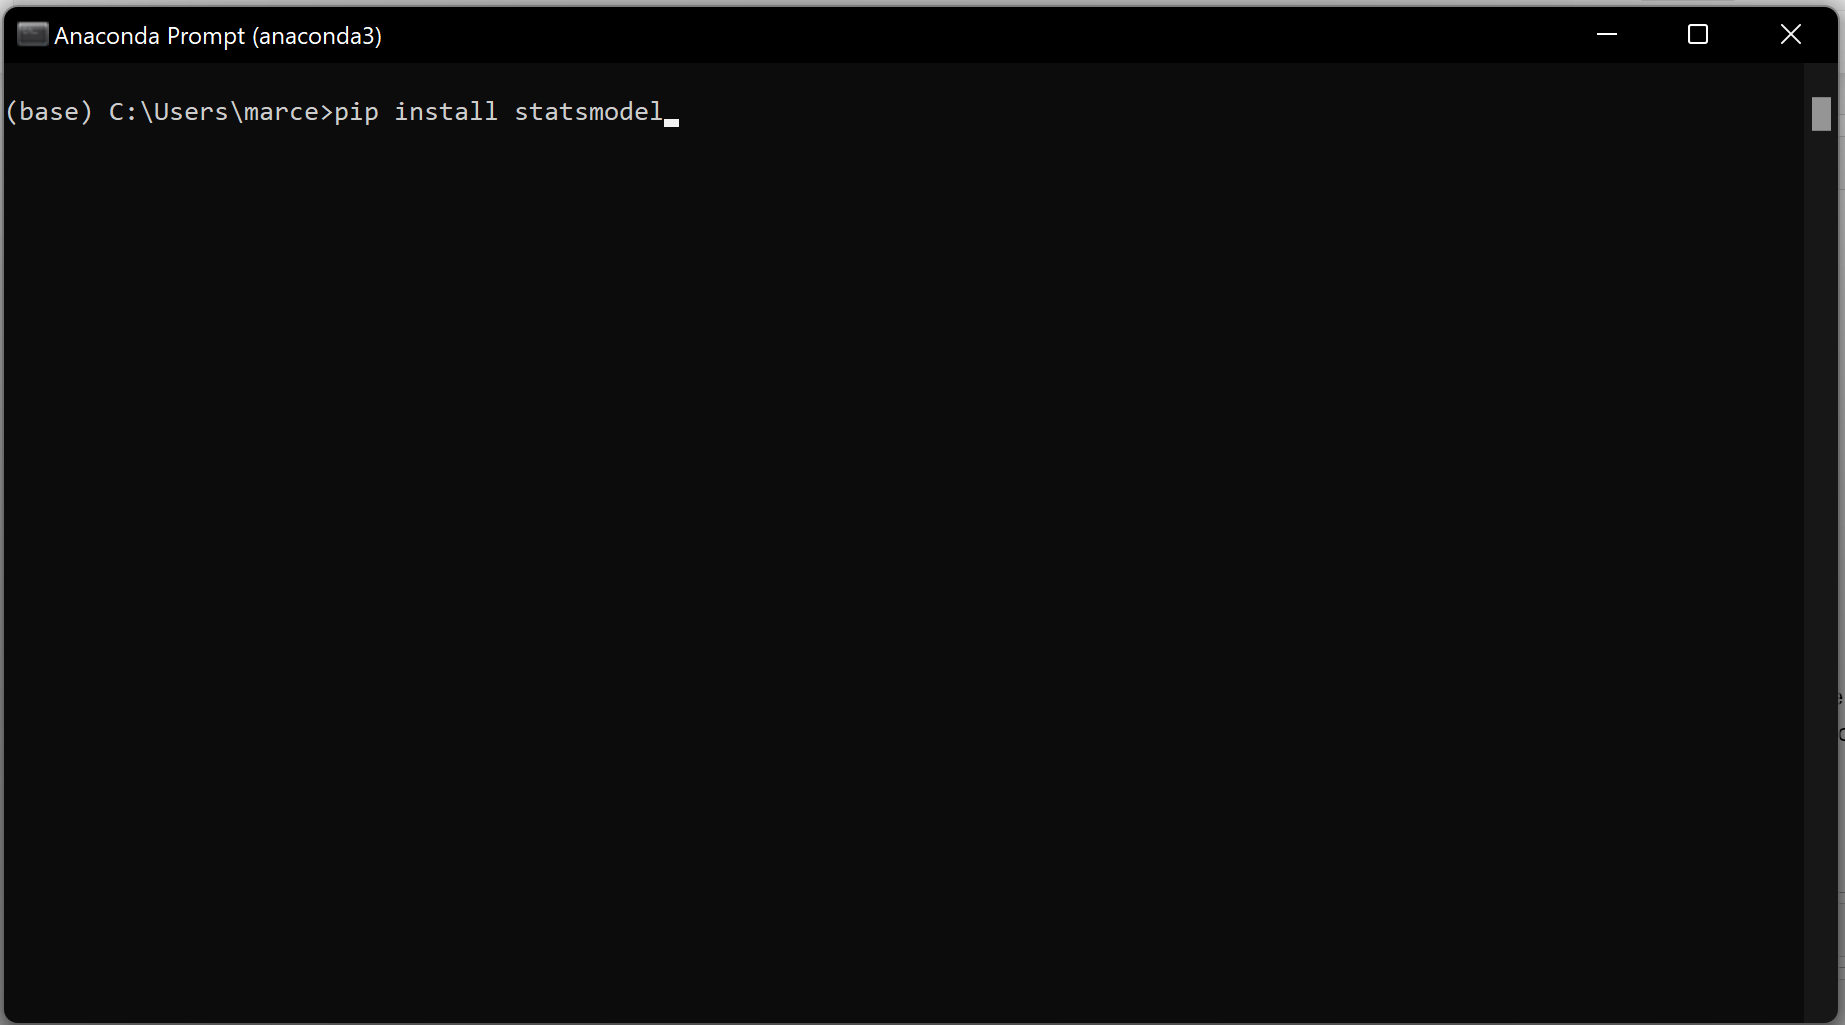

Comencemos!

Para iniciar, por favor corran o copien todos los tratamientos realizados a las variables de la base de datos de inmuebles contenida en el script anterior. El día de hoy vamos a cambiar la lógica de modelación de nuestra base de datos de inmuebles a una variable dependiente categórica para analizar cómo cambian los resultados.

### Importar los modules requeridos

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

Para la regresión y validación de supuestos llamamos a statsmodel, el módulo encargado de la notación de fórmula.

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as sms

Ahora,  llamemos a nuestra base de datos a nuestro espacio en el Jupyer Notebook:

In [28]:
df=pd.read_csv("house_dataset.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


#### Recodificar el nombre de las columnas a español

In [29]:
df.rename({'price':'precio', 'bedrooms': 'cuartos', 'bathrooms':'banios', 'stories': 'pisos', 'mainroad':'carretera',
          'guestroom':'cuarto_huespedes', 'basement': 'sotano', 'hotwaterheating':'calefaccion', 'airconditioning':'AC', 
           'parking':'parqueadero', 'prefarea':'periferia', 'furnishingstatus':'amoblado' }, axis=1, inplace=True)

### Análisis de valores extremos

Como uno de los supuestos es justamente que no haya valores atípicos influyentes, repliquemos el tratamiento a las variables de precio y área del script anterior.

#### 1. Tratamiento a la variable dependiente "Y"

In [30]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df.precio.quantile(0.25)
Q3 = df.precio.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

2310000.0


In [31]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['precio'] < (Q1 - 1.5 * IQR)) |(df['precio'] > (Q3 + 1.5 * IQR)))]
df.shape

(530, 13)

<AxesSubplot:xlabel='precio', ylabel='Density'>

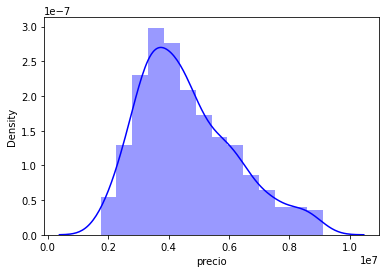

In [32]:
sns.distplot(df['precio'],color="blue")

#### 2. Tratamiento a la variable dependiente X1: área

In [33]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1_area = df.area.quantile(0.25)
Q3_area = df.area.quantile(0.75)
IQR_area = Q3_area - Q1_area  #rango intercuartil
print(IQR_area)

2768.25


In [34]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['area'] < (Q1_area - 1.5 * IQR_area)) |(df['area'] > (Q3_area + 1.5 * IQR_area)))]
df.shape

(517, 13)

<AxesSubplot:xlabel='area', ylabel='Density'>

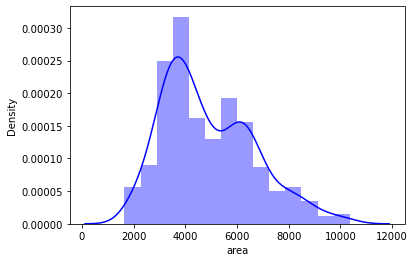

In [35]:
sns.distplot(df['area'],color="blue")

Listo, recordemos las correlaciones de las variables dado que vamos a introducir nuevas variables independiente:

#### Correlaciones entre las variables

In [36]:
df.corr().style.background_gradient(cmap='coolwarm')

,precio,area,cuartos,banios,pisos,parqueadero
precio,1.000000,0.533186,0.335328,0.466483,0.446839,0.321058
area,0.533186,1.000000,0.127745,0.171528,0.109877,0.357276
cuartos,0.335328,0.127745,1.000000,0.346230,0.406684,0.105561
banios,0.466483,0.171528,0.346230,1.000000,0.311314,0.127102
pisos,0.446839,0.109877,0.406684,0.311314,1.000000,0.022043
parqueadero,0.321058,0.357276,0.105561,0.127102,0.022043,1.000000


El siguiente paso en el tratamiento de las variables, es la recodificación de las variables cualitativas de forma numérica para que el modelo de regresión logística pueda cuantificar su incidencia en la variable dependiente de mejor manera.
Para ello, vamos a seguir un proceso para dumificar las variables categóricas con la ayuda del module de pandas.

### Recodificación de las variables categóricas

Para economizar tiempo, realicemos la recategorización de las variables por medio del module sklearn y su método de labelEncoder:

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

In [39]:
# Creamos la instancia del objeto
labelencoder = LabelEncoder()

In [40]:
df[var_cualitativas]=df[var_cualitativas].apply(LabelEncoder().fit_transform)

In [41]:
df

,precio,area,cuartos,banios,pisos,carretera,cuarto_huespedes,sotano,calefaccion,AC,parqueadero,periferia,amoblado
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,2
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


Una vez que tenemos nuestra base de datos en el estado deseado para la modelación, procedemos por fines explicativos a incluir todas las variables. En la práctica, se debería incluir aquellas que no estén correlacionadas y sean significativas.

El siguiente paso antes de la modelación, es escoger nuestra variable dependiente. Recordemos que uno de los supuestos de este modelo es que la variable respuesta tiene que ser categórica de dos niveles, por lo que en nuestra base de datos hay varias opciones. 
Para este primer ejercicio, voy a escoger a la variable de AC, la cual recoge la información de si el inmueble cuenta o no con aire acondicionado. 

Específicamente, y dado que ya estamos familiariados con la base de bienes inmuebles, me parece interesante replicar la modelación del script pasado con el modelo de regresión logística.


### El modelo de Regresión Logística en nuestra base de datos

In [43]:
regresion = sms.logit("AC ~ area + cuartos + banios + pisos + carretera + cuarto_huespedes + sotano + calefaccion +\
                precio + parqueadero + periferia + amoblado", data=df)
results = regresion.fit()

Optimization terminated successfully.
         Current function value: 0.471842
         Iterations 7


El default de Python son 35 iteraciones, si el modelo logístico no logra converger hasta ese punto, es probable que Python nos muestre un error. En nuestro ejercicio, vemos que Python a encontrado una solución después de 7 iteraciones.

In [44]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:                     AC   No. Observations:                  517
Model:                          Logit   Df Residuals:                      504
Method:                           MLE   Df Model:                           12
Date:                Mon, 17 Oct 2022   Pseudo R-squ.:                  0.2354
Time:                        07:29:05   Log-Likelihood:                -243.94
converged:                       True   LL-Null:                       -319.05
Covariance Type:            nonrobust   LLR p-value:                 5.120e-26
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.0785      0.697     -5.850      0.000      -5.445      -2.712
area               4.79e-05   7.73e-05      0.619      0.536      -0.000       0.000
cuartos             -0.0483 

Recordemos que los valores en la columna "coef" nos indican el cambio promedio en las probabilidades logarítmicas de que el inmueble tenga AC.

De los resultados obtenidos, podemos ver que algunos de los valores de p de las variables son mayores a 0.05, por lo que procedemos a eliminarlos:

In [45]:
regresion_2 = sms.logit("AC ~ calefaccion + precio", data=df)
results_2 = regresion_2.fit()

Optimization terminated successfully.
         Current function value: 0.482396
         Iterations 7


In [46]:
print(results_2.summary())

                           Logit Regression Results                           
Dep. Variable:                     AC   No. Observations:                  517
Model:                          Logit   Df Residuals:                      514
Method:                           MLE   Df Model:                            2
Date:                Mon, 17 Oct 2022   Pseudo R-squ.:                  0.2183
Time:                        07:29:18   Log-Likelihood:                -249.40
converged:                       True   LL-Null:                       -319.05
Covariance Type:            nonrobust   LLR p-value:                 5.626e-31
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.5049      0.413    -10.899      0.000      -5.315      -3.695
calefaccion    -3.5078      1.103     -3.181      0.001      -5.669      -1.346
precio       7.875e-07    8.2e-08      9.605    

_Nota No. 3: Cuando se introduce una variable categórica como variable explicativa, un nivel se considera como de referencia (normalmente codificado como 0) y el resto de niveles se comparan con él._

Listo, hemos generado un modelo que contiene variables explicativas estadísticamente significativas.
En esta línea podemos decir que, nuestro modelo logístico que modela la probabilidad de que un bien inmueble tenga AC o no, depende estadísticamente de que el inmueble tenga calefacción y del precio del inmueble.

El coeficiente estimado para la intersección es el valor esperado del logaritmo de odds de que un inmueble obtenga AC no teniendo calefacción ni precio alguno.

La interpretación de los coeficientes vendría dado como:

    "La presencia de calefacción en el inmueble, está asociado con una disminución promedio de -3.50 en las probabilidades logarítmicas de que el bien inmueble tenga AC comparado con la ausencia de la calefación en el inmueble"

Para la variable numérica del precio, la interpretación vendría dada por:

    "Cada dólar adicional del precio está asociada con una disminución promedio de 7.875e-07 en las probabilidades logarítmicas de que el inmueble tenga AC"



A más detalle y conforme al modelo:
    
El logaritmo de los odds de que un bien inmueble tenga AC está negativamente relacionado con la calefacción (coeficiente de regresión = -3.5078). Esto significa que, por cada unidad que se incrementa la variable calefacción, se espera que el logaritmo de odds de la variable AC se incremente en promedio -3.5078 unidades. Aplicando la inversa del logaritmo natural (e^-3.5078=0.029) se obtiene que, por cada unidad que se incrementa la variable calefacción, los odds de obtener AC se incremente en promedio 0.029 unidades. 


### Significancia del modelo

Para evaluar la calidad del modelo de regresión logística, podemos observar dos métricas en el resultado:

- El pseudo R^2, y
- el LLR p-value

#### El pseudo R^2

Este valor se puede considerar como el sustituto del valor de R^2 para un modelo de regresión lineal ya que al igual que en el último, oscila entre entre 0 y 1. (Los valores más altos indican un mejor ajuste del modelo) y se calcula como el cociente entre la función logarítmica de verosimilitud maximizada del modelo nulo y del modelo completo.




En este ejemplo, el valor pseudo R^2 es 0.22, que es medianamente bajo, sugiriéndonos que las variables predictoras en el modelo no hacen un buen trabajo al predecir el valor de la variable de respuesta.

#### El LLR p-value

Este valor se puede considerar como el sustituto del valor p para el valor F general de un modelo de regresión lineal.

Si este valor está por debajo de cierto umbral (por ejemplo, α = .05), entonces podemos concluir que el modelo en general es "útil" y es mejor para predecir los valores de la variable de respuesta en comparación con un modelo sin variables predictoras.



En este ejemplo, el valor p de LLR es de 5.626e-31. Dependiendo del nivel de significación que elijamos (p. ej., .01, .05, .1), podemos o no concluir que el modelo en su conjunto es útil.

A mayor detalle, en los modelos de regresión logística conviene poner atención a las siguientes secciones:

<img src="model.png" width="750">

En la sección A encontramos los coeficientes que hemos interpretado, y en la sección B nuetsro pseudo R^2, el log-likelihood y el LL-Null que corresponden al logaritmo natural de la función de estimación de máxima verosimilitud (MLE) y el valor de LL-Nul que corresponde al log-verosimilitud del modelo cuando no se incluye ninguna variable independiente (solo se incluye una intersección).

## Verificación de los supuestos de la Regresión Logística

Dado que contamos con una sola variable explicativa en este modelo de Regresión Lineal, los supuestos a verificar se centrarán en:

- Linealidad en los parámetros
    
- Normalidad en los residuos
    
- Homocedasticidad en los residuos

### 1. Variable dependiente categórica

Para comprobar este supuesto podemos inspeccionar la base de datos y comprobar su tipo de dato, o graficar por medio de un barplot, la proporción de los niveles en nuestra variable objetivo.

In [83]:
df.AC

15     0
16     1
17     1
18     1
19     1
      ..
540    0
541    0
542    0
543    0
544    0
Name: AC, Length: 517, dtype: int32

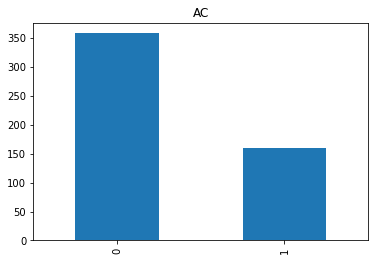

In [84]:
df.AC.value_counts().plot(kind='bar', title="AC")
plt.show()


Como observamos este supuesto se cumple dado que nuestra variable objetivo sólo tiene dos niveles.


### 3. No colinelidad perfecta ni semi-perfecta en los predictores

In [89]:
df.dtypes

precio              int64
area                int64
cuartos             int64
banios              int64
pisos               int64
carretera           int32
cuarto_huespedes    int32
sotano              int32
calefaccion         int32
AC                  int32
parqueadero         int64
periferia           int32
amoblado            int32
dtype: object

Ahora si, calculemos el VIF de nuestras vaibales para ver que tan correlacionadas están entre sí:

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
var_predictoras=['calefaccion', 'precio']

In [93]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df[var_predictoras].columns
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df[var_predictoras].values, i) for i in range(len(df[var_predictoras].columns))]

print(vif_data)
  

       feature       VIF
0  calefaccion  1.050503
1       precio  1.050503


Como ninguna de las variables alcanza un VIF mayor a 5. Pordemos concluir que el modelo no tiene problemas de multicolinearidad.

### Predicciones

Dado que un modelo logístico modela el logaritmo de Odds, estas son las unidades en las que se devuelven las predicciones. Para predecir, es necesario convertir las unidades en probabilidades mediante la función logit.

En Python, la función predict() puede devolver directamente las probabilidades en lugar de los logOddss de la siguiente forma:

In [64]:
# performing predictions on the test datdaset
y_pred = results_2.predict()

<AxesSubplot:xlabel='precio', ylabel='AC'>

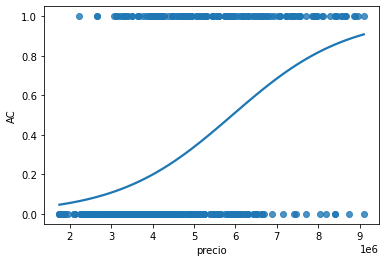

In [65]:
sns.regplot(x=df.precio, y=df.AC, data=df, logistic=True, ci=None)

## Evaluación del modelo

#### Likelihood ratio

El modelo será útil si es capaz de mostrar una mejora explicando las observaciones respecto al modelo nulo (sin predictores). El test Likelihood ratio calcula la significancia de la diferencia de residuos entre el modelo de interés y el modelo nulo

Dado que la probabilidad del modelo nulo es de: 5.626e-31, menor a 0.05, se rechaza la hipótesis de que el modelo en conjunto no es significativo, por lo que la es significativa la contribución al modelo de ambos predictores.

#### Accuracy

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [75]:
# round() Aquí estamos transformando las probabilidades a 0 y 1, comparándolas con el threshold de 0.5
rounded_pred = list(map(round, y_pred))

In [78]:
# Accuracy
print('\nNuestro modelo presenta un accuracy de: ', accuracy_score(df.AC, rounded_pred).round(2))



Nuestro modelo presenta un accuracy de:  0.78


El porcentaje de aciertos es del 78%. Esto nos dice que para las 517 observaciones de inmuebles utilizadas en el modelo, el modelo predijo correctamente si el inmueble presenta AC el 78 % de las veces.

#### Matriz de confusión

La matriz de confusión es una herramienta que permite analizar los resultados de cómo trabaja un algoritmo o modelo, para ello, en cada columna aparece el número de predicciones de cada clase, mientras que en las filas se muestra el número real de instancias de cada clase.

Por lo tanto, esta matriz pone en relación las predicciones realizadas por un algoritmo o modelo y los resultados correctos que debería haber mostrado. Así podemos medir el mayor o menor desempeño del mismo, determinando qué tipo de errores y de aciertos tiene el modelo.


<img src="matriz_confusion.png" width="550">

_Fuente: RPubs: Evaluación de modelos de clasificación, Carlos Zelada_

In [80]:
confusion_matrix(df.AC, rounded_pred) 

array([[324,  34],
       [ 82,  77]], dtype=int64)

A partir de los resultados, observamos que el modelo es capaz de clasificar correctamente 324+77/(324+34+82+77)=0.698(78%) de las observaciones de entrenamiento. 

Si se analiza en detalle cómo se distribuye el error,la matriz de confusión muestra que: 324 y 77 fueron clasificados correctamente, mientras que el modelo categorizó incorrectamente 116 bienes inmuebles de un total de 517 bienes inmuebles.


#### Conclusión

El modelo logístico creado para predecir la probabilidad de que un inmueble tenga AC  a partir de si el inmueble disponde de calefacción y su precio, es en conjunto significativo acorde al Likelihood ratio (p-value = 5.626e-31). El p-value de ambos predictores es significativo, y la matriz de confusión presenta resultados en la línea del accuracy por lo que se conluye que hemos llegado a un modelo válido.

### Próximos pasos: 

Excelente! 

Como hemos trabajado con la base de datos de los bienes inmuebles, que cuenta únicamente con 545 observaciones, lo que no es una muestra elevada, en el siguiente script aplicaremos el modelo de regresión logística a una base con más observaciones para que los resultados mejoren y entendamos de mejor manera este modelo.
